In [38]:
import pandas as pd
import numpy as np

df = pd.read_csv("sp500.csv") #s&p500 ：2019.4.12 - 2020.4.9, from Yahoo Finance
close = df['Close'] #close

logret = []


for i in range(len(close)-1):
    initial = np.log(close[i])
    final = np.log(close[i+1])
    daily = final - initial
    logret.append(daily)

    

/Users/fychen/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


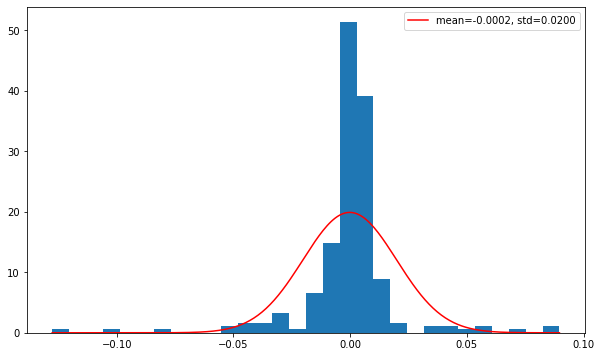

In [19]:
import scipy.stats as stats
import matplotlib.pyplot as plt

values = pd.Series(logret)  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))
loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30, normed=True)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')

In [26]:
from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

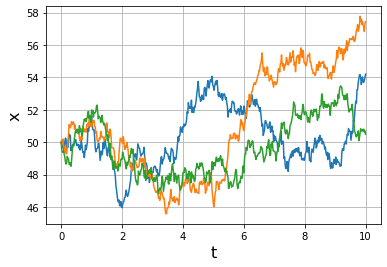

In [28]:
import numpy
from pylab import plot, show, grid, xlabel, ylabel

# The Wiener process parameter.
delta = 2
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Number of realizations to generate.
m = 3
# Create an empty array to store the realizations.
x = numpy.empty((m,N+1))
# Initial values of x.
x[:, 0] = 50

brownian(x[:,0], N, dt, delta, out=x[:,1:])

t = numpy.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()


In [36]:
from statistics import variance
from statistics import mean
mean = []
var = []

for i in range(m):
    temp = sum(x[i])/ len(x[i])
    temp2 = variance(x[i])
    mean.append(temp)
    var.append(temp2)

print(mean)
print(var)

[50.3087558791299, 51.19846991202899, 49.71725488583496]
[3.2341768099927215, 11.091683304183874, 2.926549641847353]
